# Day_081

### 練習時間
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras import optimizers

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128], Regu_ratio = 1e-4):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, 
                                   activation = "relu", 
                                   name = "hidden_layer" + str(i+1), 
                                   kernel_regularizer = l1_l2(Regu_ratio))(input_layer)
        else:
            x = Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer" + str(i+1),
                                   kernel_regularizer =  l1_l2(Regu_ratio))(x)
    
    output = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = Model(inputs = [input_layer], outputs = [output])
    return model

In [6]:
# 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer l1_l2 = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape = x_train.shape[1:], Regu_ratio = regulizer_ratio)
    model.summary()
    optimizer = optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)

    model.fit(x_train, y_train, 
              epochs = EPOCHS, 
              batch_size = BATCH_SIZE, 
              validation_data = (x_test, y_test), 
              shuffle = True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer l1_l2 = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for 

50000/50000 [==============================] - 15s 305us/step - loss: 2.4615 - acc: 0.0950 - val_loss: 2.4614 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 15s 302us/step - loss: 2.4614 - acc: 0.0997 - val_loss: 2.4612 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 15s 303us/step - loss: 2.4614 - acc: 0.0990 - val_loss: 2.4613 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 15s 303us/step - loss: 2.4614 - acc: 0.0970 - val_loss: 2.4613 - val_acc: 0.1000
Experiment with Regulizer l1_l2 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2

Epoch 48/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.7618 - acc: 0.4786 - val_loss: 1.7969 - val_acc: 0.4607
Epoch 49/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.7566 - acc: 0.4783 - val_loss: 1.8263 - val_acc: 0.4593
Epoch 50/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.7538 - acc: 0.4809 - val_loss: 1.7933 - val_acc: 0.4667
Experiment with Regulizer l1_l2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_la

50000/50000 [==============================] - 13s 257us/step - loss: 1.6163 - acc: 0.5217 - val_loss: 1.7215 - val_acc: 0.4768
Epoch 49/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.6144 - acc: 0.5239 - val_loss: 1.6689 - val_acc: 0.5062
Epoch 50/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.6114 - acc: 0.5233 - val_loss: 1.6563 - val_acc: 0.5097
Experiment with Regulizer l1_l2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)

Epoch 49/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.6143 - acc: 0.5231 - val_loss: 1.7012 - val_acc: 0.4979
Epoch 50/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.6108 - acc: 0.5224 - val_loss: 1.6557 - val_acc: 0.5059


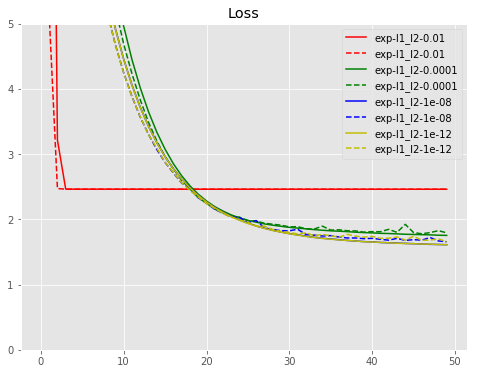

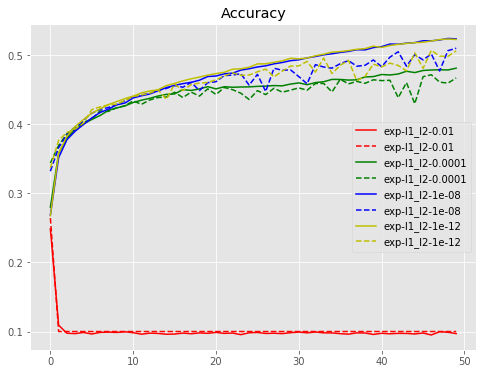

In [8]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()